In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [35]:
df = pd.read_csv("train.csv")
df_gender_submission = pd.read_csv('gender_submission.csv')
df_train.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    bool   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [37]:
df_gender_submission.head() #0 nao sobreviveu 1 sobreviveu

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


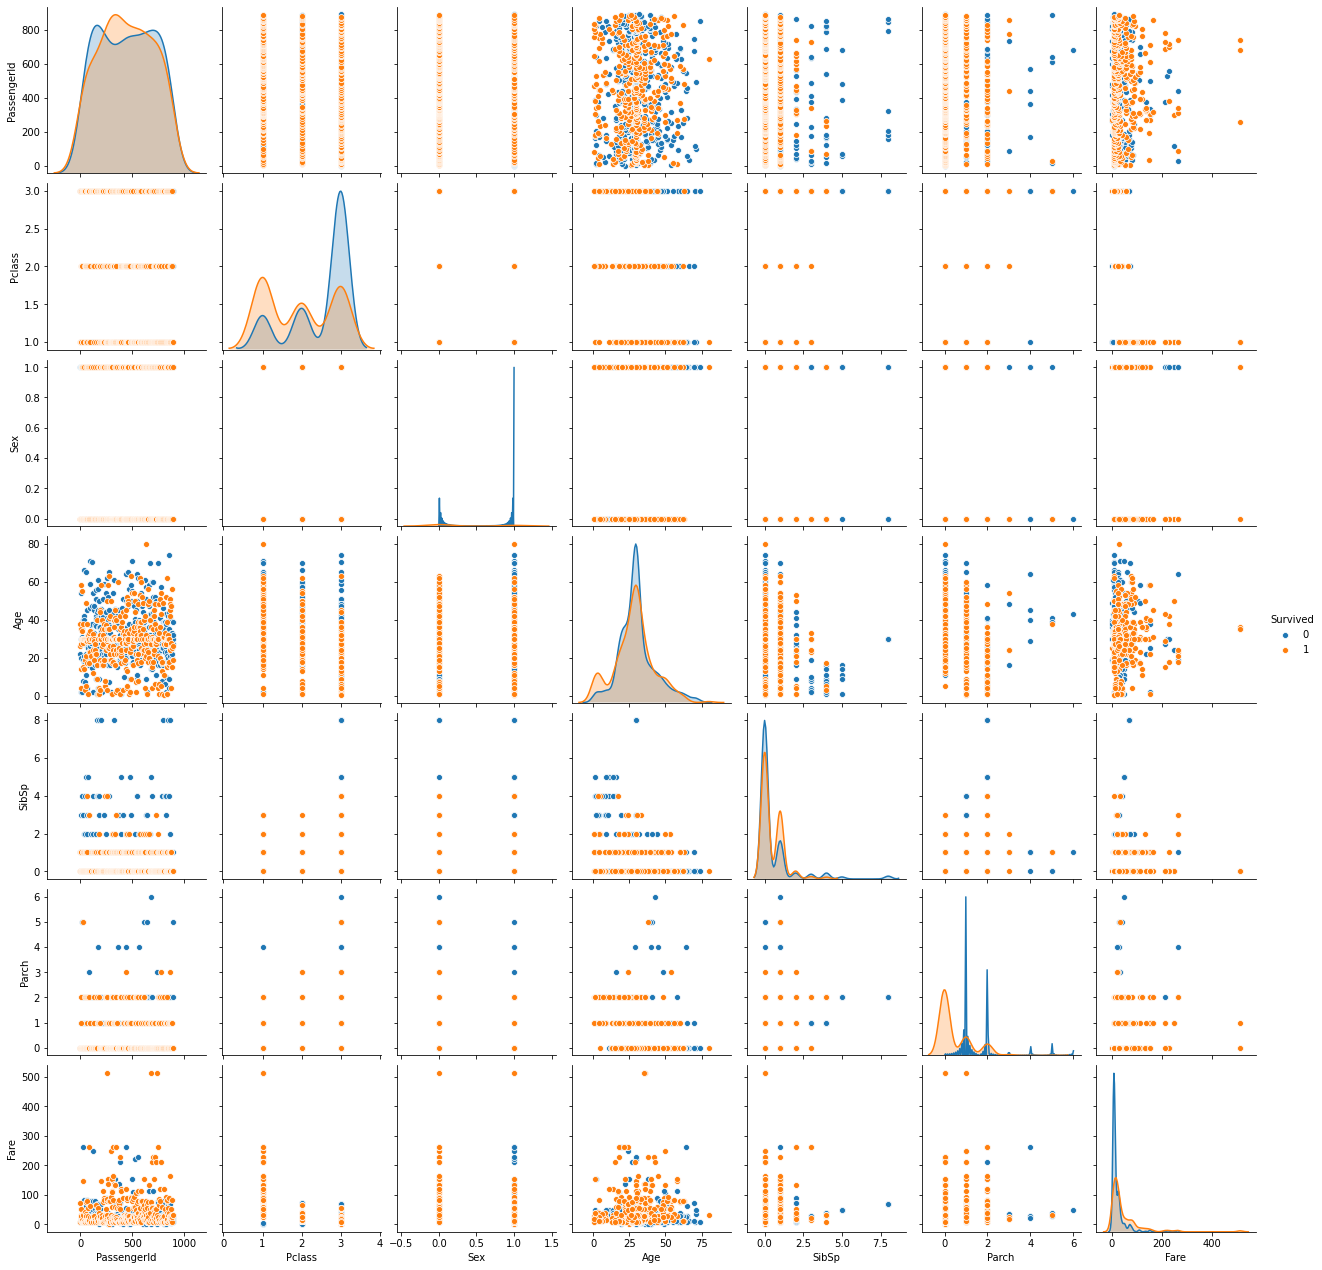

In [0]:
%matplotlib inline            
sns.pairplot(df_train, hue ='Survived')   #sns gera plot para as todos

Arrumando o df

In [38]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
#fillna preenche valores nulos com valores determinados pelo usuário

df['Sex'] = df['Sex'] == 'male'
df['Sex']

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

In [40]:
df['Sex'] = df.Sex.map(lambda i: int(i))
df['Sex'].unique()

array([1, 0])

In [39]:
df['Cabin'] = df.Cabin.fillna('N')
df['Cabin'] = df.Cabin.map(lambda x: x[0])
df.Cabin.unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [41]:
label_encoder = preprocessing.LabelEncoder()
df['Cabin']= label_encoder.fit_transform(df.Cabin)
#codifica a label (string) e transforma em um número

df['Cabin'].unique()

array([7, 2, 4, 6, 3, 0, 1, 5, 8])

In [42]:
df['Embarked'] = df.Embarked.fillna('N')
df['Embarked'] = label_encoder.fit_transform(df.Embarked)
df['Embarked'].unique()

array([3, 0, 2, 1])

##Comeco

In [0]:
from sklearn.naive_bayes import GaussianNB  #1.Escolha do modelo
model_bayes = GaussianNB()                  # 2. Escolha dos hiperparâmetros e intanciação.

In [44]:
X=df.drop(columns=['Survived','Name','Ticket','PassengerId'])
X.head()                    #Setando parametros

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [45]:
y = df.loc[:,'Survived']
y.head()                        #separamos o target

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
#3.3 Separacao do banco de dados
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2020)

In [47]:
model_bayes.fit(Xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
y_bayes = model_bayes.predict(Xtest)
y_bayes

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0])

In [49]:
ytest

708    1
199    0
327    1
516    1
252    0
      ..
313    0
219    0
274    1
675    0
584    0
Name: Survived, Length: 223, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_bayes)


0.6860986547085202

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_bayes, X, y, cv=5 )

array([0.69273743, 0.74157303, 0.79213483, 0.79775281, 0.79213483])

##Regressao Logistica

In [52]:
from sklearn.tree import DecisionTreeClassifier  # 1
model_decisiont = DecisionTreeClassifier()       # 2
                                                 # 3    
model_decisiont.fit(Xtrain, ytrain)              # 4 ajuste de modelo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# 5 Faça predições em dados novos
y_model_decisiont = model_decisiont.predict(Xtest)

In [54]:
y_model_decisiont

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1])

In [0]:
y_model_bayes = model_bayes.predict(Xtest)

In [56]:
y_model_bayes

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0])

In [57]:
accuracy_score(ytest, y_model_decisiont) 

0.7892376681614349

In [58]:
from sklearn.ensemble import RandomForestClassifier
model_rnd_forest = RandomForestClassifier()
model_rnd_forest.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_rnd_forest = model_rnd_forest.predict(Xtest)
accuracy_score(ytest, y_rnd_forest)

0.8295964125560538

##Analise dos resultados

In [0]:
from sklearn.metrics import confusion_matrix

mat_bayes = confusion_matrix(ytest, y_model_bayes) 

In [61]:
mat_bayes

array([[107,  25],
       [ 45,  46]])

Text(83.40000000000006, 0.5, 'Valores Reais')

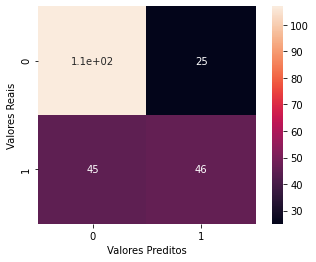

In [62]:
sns.heatmap(mat_bayes, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Text(83.40000000000006, 0.5, 'Valores Reais')

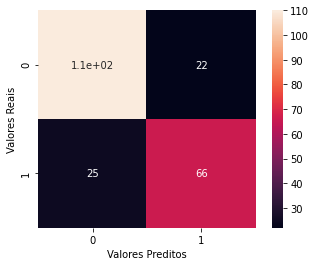

In [63]:
mat_decisiont = confusion_matrix(ytest, y_model_decisiont)
sns.heatmap(mat_decisiont, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')